# ARC5 - Résultats

D'abord, quelques fonctions d'affichage des données.

In [53]:
%matplotlib inline
import seaborn as sns

from IPython.display import display, Markdown, Latex
from matplotlib.pyplot import pie, axis, show

def show_table( title, array):
    md_table = ""
    display(Markdown(title))
    md_table += "| Ecole Doctorale | Nombre de thèses |\n"
    md_table += "| --- | --- |\n"
    for c in Counter(array).most_common():
        md_table +="| %s | %s | \n"%(c[0], c[1])
    display(Markdown(md_table))

def moyenne(tableau):
    """Calculer une moyenne d'après un tableau"""
    return sum(tableau, 0.0) / len(tableau)

def count_plot(list_to_count, title=None, xlabel=None, ylabel="Count", order=None):
    
    g = sns.countplot(list_to_count, palette="Set2", order=order)

    # remove the top and right line in graph
    sns.despine()

    # size
    g.figure.set_size_inches(7, 6)

    # axes 
    g.set_xlabel(xlabel.decode('utf-8'),size = 16,  alpha=0.5)
    g.set_ylabel(ylabel.decode('utf-8'),size = 16,  alpha=0.5)

    # title
    g.axes.set_title(title.decode('utf-8'), 
        fontsize=18, color="b",alpha=0.3, x=0.5, y=1.1)
    
    # show
    sns.plt.show()
    
    return g

def pie_chart(list_to_count, title=None, xlabel=None, ylabel="Count", order=None):
    print list_to_count
    
    g = pie(list_to_count, palette="Set2", labels=labels);

    g = sns.countplot(list_to_count, palette="Set2", order=order)

    # remove the top and right line in graph
    sns.despine()

    # size
    g.figure.set_size_inches(7, 6)

    # axes 
    g.set_xlabel(xlabel.decode('utf-8'),size = 16,  alpha=0.5)
    g.set_ylabel(ylabel.decode('utf-8'),size = 16,  alpha=0.5)

    # title
    g.axes.set_title(title.decode('utf-8'), 
        fontsize=18, color="b",alpha=0.3, x=0.5, y=1.1)
    
    # show
    sns.plt.show()
    
    return g

# Importer le graphe des partenaires

D'abord nous importons les données de graphe calculées précédemment.

In [54]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import csv
import json
import networkx as nx
from collections import Counter
import dateutil.parser as parser


# load grap with everything inside
from networkx.readwrite import read_gpickle

# with projects
display(Markdown("## Graphes avec les projets "))

G_with_projects = read_gpickle('../final/ARC5-nx-with-projects.pickle')
print "%s nodes"%len(G_with_projects.nodes())
print "%s edges"%len(G_with_projects.edges())

show_table( "## Type des partenaires", [ n[1]["type"] for n in G_with_projects.nodes(data=True) ])

# without projects
display(Markdown("## Graphes sans les projets "))

G_without_projects = read_gpickle('../final/ARC5-nx-without-projects.pickle')
print "%s nodes"%len(G_without_projects.nodes())
print "%s edges"%len(G_without_projects.edges())

show_table( "## Type des partenaires", [ n[1]["type"] for n in G_without_projects.nodes(data=True) ])


## Graphes avec les projets 

403 nodes
564 edges


## Type des partenaires

| Ecole Doctorale | Nombre de thèses |
| --- | --- |
| projet | 67 | 
| laboratoire | 64 | 
| ADR | 54 | 
| médiation | 51 | 
| patrimoine | 46 | 
| création | 37 | 
| localité | 36 | 
| etablissement | 14 | 
| enseignement | 11 | 
| ecole-doctorale | 10 | 
| cst | 6 | 
| économique | 6 | 
| postdoc | 1 | 


## Graphes sans les projets 

281 nodes
1024 edges


## Type des partenaires

| Ecole Doctorale | Nombre de thèses |
| --- | --- |
| laboratoire | 64 | 
| médiation | 51 | 
| patrimoine | 46 | 
| création | 37 | 
| localité | 36 | 
| etablissement | 14 | 
| enseignement | 11 | 
| ecole-doctorale | 10 | 
| cst | 6 | 
| économique | 6 | 


## Les Allocations Doctorales


In [55]:
fichier_theses = "../final/ARC5-Final - ARC5-ADR.csv"

villes_etablissements = {
  "UNIVERSITE JOSEPH FOURIER - GRENOBLE 1" : "Grenoble",
  "Ecole Nationale des Travaux Publics de l'Etat" : "Lyon",
  "UNIVERSITE JEAN MOULIN LYON 3" : "Lyon",
  "INSA LYON (Institut national des sciences appliquées de Lyon)" : "Lyon",
  "UNIVERSITE CLAUDE BERNARD - LYON 1" : "Lyon",
  "UNIVERSITE JEAN MONNET - SAINT ETIENNE" : "Saint-Etienne",
  "UNIVERSITE LUMIERE - LYON 2" : "Lyon",
  "UNIVERSITE PIERRE MENDES FRANCE - GRENOBLE 2" : "Grenoble",
  "ENS LYON (Ecole normale supérieure de Lyon)" : "Lyon",
  "IEP GRENOBLE (Institut d’Etudes Politiques de Grenoble)" : "Grenoble",
  "CNRS - Centre national de la recherche scientifique (Délégation Auvergne Rhône-Alpes)" : "Lyon",
  "UNIVERSITE STENDHAL GRENOBLE - 3" : "Grenoble",
  "UNIVERSITE DE SAVOIE" : "Chambéry",
  "ENSSIB (École nationale supérieure des sciences de l'information et des bibliothèques)" : "Lyon"
}


ecoles_doctorales = []
etablissements_theses = []
labos_theses = []

with open( fichier_theses, "r") as f :
    reader = csv.DictReader(f)
    for i, line in enumerate(reader) :
        ecoles_doctorales.append(line["Ecole doctorale"])
        etablissements_theses.append(line["Etablissement gestionnaire"])
        labos_theses.append(line["Laboratoire"])


display(Markdown("## Thèses"))

display(Markdown("### Combien y a-t-il de thèses au total ? "))
print "%s thèses"%(i+1) 
  
show_table("### Quelles sont les écoles doctorales impliquées dans la direction des thèses ?", ecoles_doctorales)

show_table("### Quelles sont les établissement gestionnaire des thèses ?", etablissements_theses)
    
show_table("### A quelles villes sont rattachées ces établissement ?", [villes_etablissements[t] for t in etablissements_theses] )

show_table("### Quels laboratoires  encadrent ces thèses ?", labos_theses)


## Thèses

### Combien y a-t-il de thèses au total ? 

57 thèses


### Quelles sont les écoles doctorales impliquées dans la direction des thèses ?

| Ecole Doctorale | Nombre de thèses |
| --- | --- |
| ScSo, ED 483 (sciences sociales) | 12 | 
| LLSH, ED 50 (Langues, Littératures et Sciences Humaines) | 10 | 
| EPIC, 485 (Education - Psychologie - Information et Communication) | 9 | 
| SHPT, ED 454 (Sciences de l'homme, du politique et du territoire) | 8 | 
| 3LA, ED 484 (Lettres, langues, linguistique et arts) | 8 | 
| SEG, ED 486 (Sciences Economiques et de Gestion) | 3 | 
| PHCR, ED 487 (Philosophie, histoire, création, représentation ) | 2 | 
| Infomath, ED 512 | 2 | 
|  | 1 | 
| SIS, ED 488 (Sciences Ingénierie Santé) | 1 | 
| PHAST, ED 52 (Physique et Astrophysique) | 1 | 


### Quelles sont les établissement gestionnaire des thèses ?

| Ecole Doctorale | Nombre de thèses |
| --- | --- |
| UNIVERSITE LUMIERE - LYON 2 | 15 | 
| UNIVERSITE STENDHAL GRENOBLE - 3 | 11 | 
| UNIVERSITE JEAN MONNET - SAINT ETIENNE | 9 | 
| UNIVERSITE PIERRE MENDES FRANCE - GRENOBLE 2 | 8 | 
| ENS LYON (Ecole normale supérieure de Lyon) | 5 | 
| UNIVERSITE JEAN MOULIN LYON 3 | 4 | 
| INSA LYON (Institut national des sciences appliquées de Lyon) | 2 | 
| UNIVERSITE CLAUDE BERNARD - LYON 1 | 2 | 
| IEP GRENOBLE (Institut d’Etudes Politiques de Grenoble) | 1 | 


### A quelles villes sont rattachées ces établissement ?

| Ecole Doctorale | Nombre de thèses |
| --- | --- |
| Lyon | 28 | 
| Grenoble | 20 | 
| Saint-Etienne | 9 | 


### Quels laboratoires  encadrent ces thèses ?

| Ecole Doctorale | Nombre de thèses |
| --- | --- |
| LIDILEM (Laboratoire de Linguistique et Didactique des Langues Etrangères et Maternelles) | 5 | 
| LARHRA (Laboratoire de Recherche Historique Rhône-Alpes) | 4 | 
| Centre Max Weber (Laboratoire de sociologie) UMR 5283 | 4 | 
| ELICO (Équipe de recherche de Lyon en sciences de l'Information et de la COmmunication) | 3 | 
| CIEREC (Centre Interdisciplinaire d’Études et de Recherches sur l’Expression Contemporaine) | 3 | 
| GRESEC (Groupe de Recherche sur les Enjeux de la Communication ) | 3 | 
| LITT&ARTS (UMR 5316) | 3 | 
| S2HEP - Sciences, société, Historicité, Education, Pratiques | 3 | 
| EVS - Environnement Ville Société | 3 | 
| CRHIPA - Centre de Recherches en Histoire et histoire de l'art, Italie, Pays Alpins, interactions internationales | 3 | 
| LIRE (Littérature, Idéologies et Représentations aux XVIIIe et XIXe siècles) | 2 | 
| CIHAM – Histoire, Archéologie, Littératures des mondes chrétiens et musulmans médiévaux | 2 | 
| LIRIS (Laboratoire d'informatique en images et systèmes d'information) | 2 | 
| LSE - Laboratoire des Sciences de l'Éducation | 2 | 
| PLC (Philosophie, Langages & cognition) | 2 | 
|  | 1 | 
| EMC2 - LSG (Emotion Médiation Culture Connaissance - Laboratoire de sociologie de Grenoble) | 1 | 
| ERIC - Entrepôts, Représentation et Ingénierie des Connaissances | 1 | 
| Laboratoire de Physique de l’ENS de Lyon | 1 | 
| Triangle (Action, discours, pensée politique et économique) | 1 | 
| Passages XX-XXI (EA 4160) | 1 | 
| Institut Claude Longeon | 1 | 
| IRG - Institut de Recherche en Géographie | 1 | 
| IRPHIL - Institut de Recherches Philosophiques de Lyon | 1 | 
| Centre Norbert Elias | 1 | 
| ICAR (Interactions, Corpus, Apprentissages, Représentations) | 1 | 
| Pacte - Politiques publiques, ACtion politique, TErritoires (UMR 5194) | 1 | 
| GATE (Groupe d'Analyse et de Théorie Economique) | 1 | 


In [56]:
import dateutil.parser as parser

theses = [n for n in G_with_projects.nodes(data=True) if n[1]["type"] == "ADR" and n[1]["orga"] == "ARC5"]
print "%s thèses"%len(theses)

# Nombre de thèses (cluster 13 et 14 puis ARC5)
theses_partenaires = []
theses_labos = []
theses_etablissements = []
theses_villes = []

# Nombre de thèses avec partenaires (socio-économiques et socio-culturels)
print "###"*15
for these in theses: 
    neighbors = G_with_projects.neighbors(these[0])
    print these[1]["name"] 
    print "* total liens : %s "%len(neighbors)
    print "* type de liens  : %s "%Counter([G_with_projects.node[n]["type"] for n in neighbors])
    
    labos = [ n for n in neighbors if G_with_projects.node[n]["type"] == "laboratoire" ]
    theses_labos.append( labos )

    print "* nombre de labos partenaires : %s"%len(labos)
    
    partenaires = [ n for n in neighbors if G_with_projects.node[n]["type"] not in ["projet","laboratoire", "ecole-doctorale", "etablissement", "ville", "these" ] ]
    theses_partenaires.append(partenaires)
    print "* nombre total de partenaires (hors labo et etablissements) : %s"%len(partenaires)
    
    etablissements = [ n for n in neighbors if G_with_projects.node[n]["type"] == "etablissement" ]
    theses_etablissements.append(etablissements)
    print "* nombre total d'etablissements (hors labo) : %s"%len(etablissements)
    
    villes = [ n for n in neighbors if G_with_projects.node[n]["type"] == "ville" ]
    theses_villes.append(villes)
    print "* villes impliquées : %s"%len(villes)
    
    print "-"*15

46 thèses
#############################################
Edition nativement numérique des œuvres hagiographiques inédites de Wauchier de Denain ms. BnF fr. 412 
* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------
Développement d'interfaces pour le WEB destinées à rendre accessibles les outils de la création musicale contemporaine.
* total liens : 7 
* type de liens  : Counter({'enseignement': 3, 'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------
Analyse des représentations, attitudes et positionnements de publics jeunes à l’égard de

### Résulats  des thèses

46 thèses
* thèses par annnée : [(2011, 7), (2012, 9), (2014, 12), (2015, 9), (2016, 9)] 


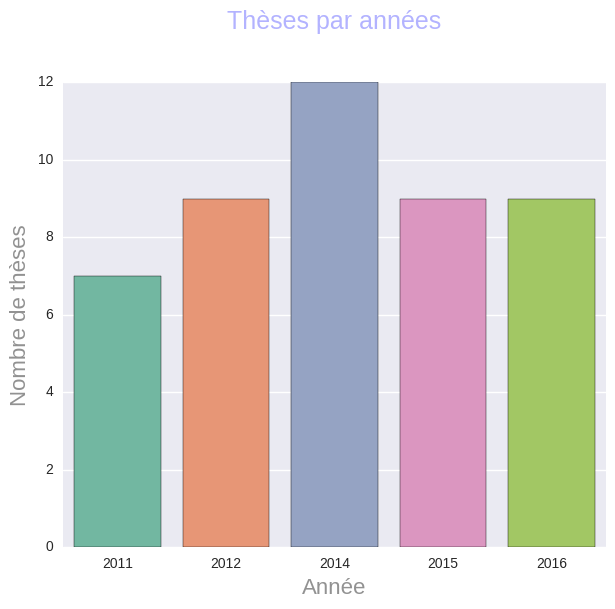

* nombre de partenaires par thèse : Counter({0: 12, 1: 12, 2: 9, 3: 8, 4: 2, 7: 2, 5: 1})
* nombre de partenaires par thèse : 1.76086956522
* type de partenaires des thèses : Counter({'patrimoine': 28, 'm\xc3\xa9diation': 16, 'cr\xc3\xa9ation': 9, 'enseignement': 7, 'cst': 4, '\xc3\xa9conomique': 3})


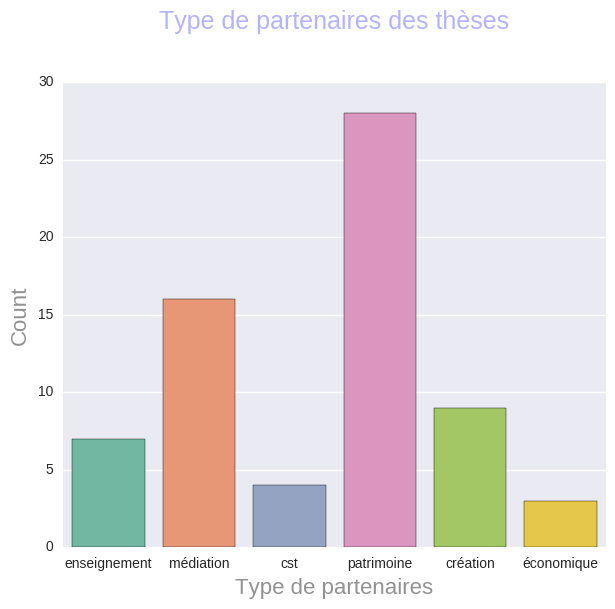

* nombre de labos par thèses : Counter({1: 36, 2: 10})
* moyenne du nombre de labos par thèse 1.21739130435
| GRESEC (Groupe de Recherche sur les Enjeux de la Communication ) | 4 |
| LITT&ARTS (UMR 5316) | 4 |
| EVS - Environnement Ville Société | 4 |
| PLC (Philosophie, Langages & cognition) | 3 |
| LIDILEM (Laboratoire de Linguistique et Didactique des Langues Etrangères et Maternelles) | 3 |
| LARHRA (Laboratoire de Recherche Historique Rhône-Alpes) | 3 |
| CIEREC (Centre Interdisciplinaire d’Études et de Recherches sur l’Expression Contemporaine) | 3 |
| ELICO (Équipe de recherche de Lyon en sciences de l'Information et de la COmmunication) | 3 |
| S2HEP - Sciences, société, Historicité, Education, Pratiques | 3 |
| Centre Max Weber (Laboratoire de sociologie) UMR 5283 | 3 |
| Passages XX-XXI (EA 4160) | 2 |
| CRHIPA (Centre de Recherche en Histoire et histoire de l'art. Italie, Pays Alpins) | 2 |
| EMC2 - LSG (Emotion Médiation Culture Connaissance - Laboratoire de sociologie de G

In [30]:
# Nombre total de thèses
print "%s thèses"%len(theses)


# Nombre de thèses par années
# TODO : parse end date
def getKey(item):
    return item[0]

years_start =[ parser.parse(str(these[1]["start"])).year for these in theses ]
print "* thèses par annnée : %s "%sorted(Counter(years_start).most_common(), key=getKey)

count_plot([y for y in years_start ], ylabel="Nombre de thèses", xlabel="Année", title='Thèses par années')

# TODO: Durée moyenne des thèses (données Corinne)
# 
# Nombres et types d’organismes partenaires

print "* nombre de partenaires par thèse : %s"%Counter([len(p) for p in theses_partenaires])
print "* nombre de partenaires par thèse : %s"%moyenne([len(p) for p in theses_partenaires])
theses_partenaires_type = []
for ps in theses_partenaires: 
    theses_partenaires_type += [ G_with_projects.node[p]["type"] for p in ps if G_with_projects.node[p]["type"] != "ADR" and G_with_projects.node[p]["type"] != "localité" ]
print "* type de partenaires des thèses : %s"%Counter( theses_partenaires_type )

count_plot([t.decode('utf-8') for t in theses_partenaires_type], xlabel="Type de partenaires", title='Type de partenaires des thèses')

# Nombre de laboratoires de recherche
print "* nombre de labos par thèses : %s"%Counter([ len(l) for l in theses_labos ])
print "* moyenne du nombre de labos par thèse %s"%moyenne([ len(l) for l in theses_labos ])

for l in Counter([item for sublist in theses_labos for item in sublist]).most_common():
    print "|", G_with_projects.node[l[0]]["name"], "|", l[1] ,"|"
    
print
# Nombre d’établissements porteurs
print "* nombre d'établissements par thèse : %s"%Counter([ len(e) for e in theses_etablissements])
print "* moyenne du nombre d'établissements par thèse : %s"%moyenne([ len(e) for e in theses_etablissements])

# TODO : Nombres de thèses par axe thématique
# theses_axes = [ t[1]["axe"] for t in theses]
# print "* axes des thèses: %s"%Counter(theses_axes)


# Nombre de thèses multi-sites
# TODO ???

# TODO : Relations territoriales entre les différents partenaires
for ps in theses_partenaires: 
    neighbors = []
    for p in ps:
        neighbors += G_with_projects.neighbors(p) 
#     print "%s / %s"%(len(ps),len(neighbors))
    villes = [ n for n in neighbors if G_with_projects.node[n]["type"] == "ville" ]
#     print villes
#   print "* villes des partenaires : %s"%Counter( [ partenaires[p] for p in ps] )


In [8]:
# Qui sont les partenaires des thèses ? 
parts = []
for t in theses_partenaires:
    parts +=t
    
for c in Counter(parts).most_common():
    if c[1] > 1:
        print "|", G_with_projects.node[c[0]]["name"],"|", G_with_projects.node[c[0]]["type"],"|", c[1],"|"

print len(Counter(parts).most_common()), "partenaires"


| Bibliothèque municipale de Lyon | patrimoine | 5 |
| Musées Gadagne | patrimoine | 3 |
| Service Science & Société de l’Université de Lyon | cst | 3 |
| CNSMD (Conservatoire National Supérieur Musique et Danse de Lyon) | enseignement | 2 |
| Musée d’Art Moderne de Saint-Étienne Métropole | patrimoine | 2 |
| Le Rize | patrimoine | 2 |
70 partenaires


## Les Projets de Recherche Financés

In [136]:
projets = [n for n in G_with_projects.nodes(data=True) if n[1]["type"] == "projet" and n[1]["orga"] == "ARC5"]
print "%s projets"%len(projets)

# Nombre de projets (cluster 13 et 14 puis ARC5)
projets_partenaires = []
projets_labos = []
projets_etablissements = []
projets_villes = []

# Nombre de projets avec partenaires (socio-économiques et socio-culturels)
print "###"*15
for projet in projets:
    
    neighbors = G_with_projects.neighbors(projet[0])
    print projet[1]["name"] 
    print "* total liens : %s "%len(neighbors)
    print "* type de liens  : %s "%Counter([G_with_projects.node[n]["type"] for n in neighbors])
    
    labos = [ n for n in neighbors if G_with_projects.node[n]["type"] == "laboratoire" ]
    projets_labos.append( labos )
    projet[1]["labos"] = labos

    print "* nombre de labos partenaires : %s"%len(labos)
    
    partenaires = [ n for n in neighbors if G_with_projects.node[n]["type"] not in ["projet","laboratoire", "ecole-doctorale", "etablissement", "ville", "projet" ] ]
    projets_partenaires.append(partenaires)
    print "* nombre total de partenaires (hors labo et etablissements) : %s"%len(partenaires)
    
    etablissements = [ n for n in neighbors if G_with_projects.node[n]["type"] == "etablissement" ]
    projets_etablissements.append(etablissements)
    print "* nombre total d'etablissements (hors labo) : %s"%len(etablissements)
    
    villes = [ n for n in neighbors if G_with_projects.node[n]["type"] == "ville" ]
    projets_villes.append(villes)
    print "* villes impliquées : %s"%len(villes)
    
    print "-"*15

66 projets
#############################################
Genre et groupe social : approche développementale de la construction précoce de l'identité sociolinguistique dans les interactions parents-enfants
* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------
Séminaire : Ecrire les modernités arabes
* total liens : 5 
* type de liens  : Counter({'m\xc3\xa9diation': 3, 'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------
Les principes de justice dans l'économie saint-simonienne : un éclairage actuel sur les « socialismes ».
* total liens : 3 
* type de liens  : Counter({'ecole-doct

66 projets
* projets par annnée : [(2012, 27), (2013, 39)] 
* nombre de partenaires par projet : Counter({0: 22, 1: 12, 3: 8, 4: 8, 2: 6, 5: 5, 6: 2, 9: 1, 10: 1, 11: 1})
* moyenne de partenaires par projet: 2.22727272727


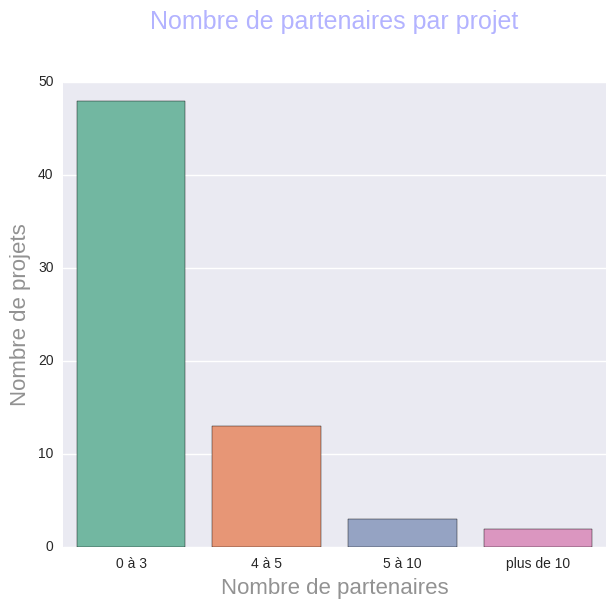

* type de partenaires des projets : Counter({'patrimoine': 49, 'm\xc3\xa9diation': 33, 'creation': 31, 'enseignement': 7, 'cst': 5, '\xc3\xa9conomique': 3})


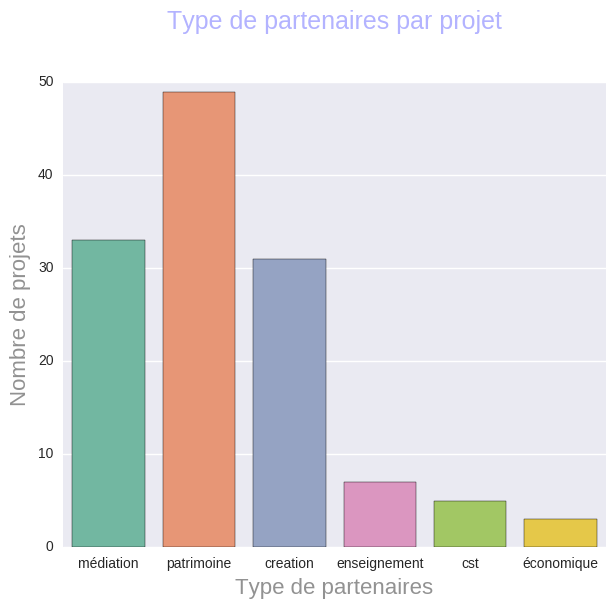

* nombre de projets par partenaire : Counter({1: 99, 2: 16, 9: 1, 3: 1, 4: 1})
* moyenne de projets par partenaire : 1.24576271186
* total nombre de partenaires 118
* total nombre de labos 34
* total nombre d'établissements 13
* nombre d'établissements par projet : Counter({1: 66})
* nombre de projets par établissement : [(u'universite-stendhal-grenoble-3', 14), (u'ens-lyon-ecole-normale-superieure-de-lyon', 11), (u'universite-pierre-mendes-france-grenoble-2', 8), (u'cnrs-centre-national-de-la-recherche-scientifique-delegation-auvergne-rhone-alpes', 8), (u'universite-lumiere-lyon-2', 8), (u'universite-jean-monnet-saint-etienne', 4), (u'universite-jean-moulin-lyon-3', 3), (u'universite-de-savoie', 3), (u'enssib-ecole-nationale-superieure-des-sciences-de-linformation-et-des-bibliotheques', 2), (u'iep-grenoble-institut-detudes-politiques-de-grenoble', 2), (u'universite-claude-bernard-lyon-1', 1), (u'universite-joseph-fourier-grenoble-1', 1), (u'insa-lyon-institut-national-des-sciences-app

In [87]:
# Nombre total de projets
print "%s projets"%len(projets)

# Nombre de projets par années
# TODO : parse end date
def getKey(item):
    return item[0]

years_start =[ parser.parse(str(these[1]["start"])).year for these in projets ]
print "* projets par annnée : %s "%sorted(Counter(years_start).most_common(), key=getKey)

# Nombres et types d’organismes partenaires
print "* nombre de partenaires par projet : %s"%Counter([len(p) for p in projets_partenaires])
print "* moyenne de partenaires par projet: %s"%moyenne([len(p) for p in projets_partenaires])
partenaires_counts=[] 
for count in [len(p) for p in projets_partenaires]:
    if count <= 3 : partenaires_counts.append("0 à 3")
    elif count > 3 and count <6 : partenaires_counts.append("4 à 5")
    elif count > 5 and count < 10 : partenaires_counts.append("5 à 10")
    elif count > 9 : partenaires_counts.append("plus de 10")

order = ["0 à 3", "4 à 5", "5 à 10","plus de 10"]
count_plot([p.decode('utf-8') for p in partenaires_counts], 
           ylabel="Nombre de projets", 
           xlabel="Nombre de partenaires", 
           title="Nombre de partenaires par projet",
           order=[t.decode('utf-8') for t in order])


# type de partenaires
projets_partenaires_type = []
for ps in projets_partenaires: 
    projets_partenaires_type += [ G.node[p]["type"] for p in ps if G.node[p]["type"] not in ["these", "ADR", "localité", "postdoc"] ]
print "* type de partenaires des projets : %s"%Counter( projets_partenaires_type )

count_plot([t.decode('utf-8') for t in projets_partenaires_type], ylabel="Nombre de projets", xlabel="Type de partenaires", title='Type de partenaires par projet')


# Nombre d’occurrences de partenaires / Distribution (de 0 à 2, de 2 à 5, 5 et +)
projets_partenaires_noms = []
for ps in projets_partenaires: 
    projets_partenaires_noms += [ p for p in ps if G.node[p]["type"] not in ["these", "projet"] ]
# print "* nombre de projets par partenaires : %s"%Counter( projets_partenaires_noms )
print "* nombre de projets par partenaire : %s"%Counter( [c[1] for c in Counter( projets_partenaires_noms ).most_common()])
print "* moyenne de projets par partenaire : %s"%moyenne( [c[1] for c in Counter( projets_partenaires_noms ).most_common()])

print "* total nombre de partenaires %s"%len(set(projets_partenaires_noms))
print "* total nombre de labos %s"%len(set([labo for l in projets_labos for labo in l]))
print "* total nombre d'établissements %s"%len(set([etabl for e in projets_etablissements for etabl in e]))
# projets_par_partenaires_counts=[] 
# for count in [len(p) for p in projets_partenaires]:
#     if count <= 3 : partenaires_counts.append("0 à 3")
#     elif count > 3 and count <6 : partenaires_counts.append("4 à 5")
#     elif count > 5 and count < 10 : partenaires_counts.append("5 à 10")
#     elif count > 9 : partenaires_counts.append("plus de 10")

# Nombre d’établissements porteurs
print "* nombre d'établissements par projet : %s"%Counter([ len(e) for e in projets_etablissements])

# Moyenne des projets par établissement porteurs ou labos
projets_etablissements_noms = []
for es in projets_etablissements:
    projets_etablissements_noms += [ e for e in es]
print "* nombre de projets par établissement : %s"%Counter(projets_etablissements_noms).most_common()


# TODO : Nombres de projets par axe thématique
# projets_axes = [ t[1]["axe"] for t in projets]
# print "* axes des projets: %s"%Counter(projets_axes)

# TODO: Nombre de projets par sites
# print "* projets par ville (établissements) : %s"%Counter( [villes_etablissements[t] for t in projets_etablissements_noms] )

# Nombre de projets multi-sites
# TODO ???

# Relations territoriales entre les différents partenaires
# projets_villes = []
# projets_all_villes = []
# for i, ps in enumerate(projets_partenaires): 
#     neighbors = []
#     for p in ps:
#         neighbors += G.neighbors(p)
#     villes = [ n for n in neighbors if G.node[n]["type"] == "ville" ]
    
#     # add etablissement
#     if len(projets_etablissements[i]) and not projets_etablissements[i][0].startswith("etablissement") :
#         villes.append(villes_etablissements[ projets_etablissements[i][0] ])
#     projets_villes.append(villes)
#     projets_all_villes += villes
#     print "%s : %s"%(projets[i][1]["name"], villes)
    
# print "* nombre de villes des partenaires par projets : %s"%Counter( [ len(p) for p in projets_villes] )
# print "* nombre de fois une ville d'un partenaire est associée à un projet : %s"%Counter( projets_all_villes )

# Moyenne des projets par organisme de recherche (labos ou établissements)
# Moyenne des projet par types de partenaires

# Nombre de laboratoires de recherche
print "* nombre de labos par projets : %s"%Counter([ len(l) for l in projets_labos ])
print "| Nom du laboratoire | Nombre de projets |"
print "|-|-|"
for l in Counter([lab for p in projets_labos for lab in p]).most_common():
#     print l[0]
    print "|", G.node[l[0]]["name"], "|", l[1], "|"
    



### Relations au sein du réseau


In [91]:
# L'ensemble de ces éléments sera calculé pour les thèses, les projets de recherche, puis les deux.

# Nombre et fréquence des partenariats entre centres de recherche
edges_labos_to_labos = []
for e in G_without_projects.edges():
    if G_without_projects.node[e[0]]["type"] == "laboratoire" and G_without_projects.node[e[1]]["type"] == "laboratoire":
        edges_labos_to_labos.append(e)
print "nombre de partenariats identifiés entre labos: %s"%len(edges_labos_to_labos)

# Relations entre laboratoires et partenaires (nombre de liens entre les différents partenaires culture et recheches)
partenaires_types= ["creation", "patrimoine", "médiation", "enseignement", "cst", "economique"]
edges_partenaires_et_labos = []
for e in G_without_projects.edges():
    if (G_without_projects.node[e[0]]["type"] == "laboratoire" and G_without_projects.node[e[1]]["type"] in partenaires_types) or (G_without_projects.node[e[0]]["type"] in partenaires_types and G_without_projects.node[e[1]]["type"] == "laboratoire"):
        edges_partenaires_et_labos.append(e)
print "nombre de partenariats identifiés entre labos et partenaires: %s"%len(edges_partenaires_et_labos)

partenaires_uniques = [n for n in G_without_projects.nodes(data=True) if n[1]["type"] in partenaires_types ]
print len(partenaires_uniques)
        
# Territoires : relations entre sites (nombre de projets communs, type de projet communs )
projets_multi_villes = []
for e in G.edges():
    if (G.node[e[0]]["type"] == "projet" and G.node[e[1]]["type"] == "ville") or (G.node[e[0]]["type"] == "ville" and G.node[e[1]]["type"] == "projet"):
        projets_multi_villes.append(e)
print "nombre de projets sur plusieurs villes : %s"%len(projets_multi_villes)



nombre de partenariats identifiés entre labos: 12
nombre de partenariats identifiés entre labos et partenaires: 169
114
nombre de projets sur plusieurs villes : 0


### Evolution temporelle


In [58]:
# Les clusters 13 et 14
# Nombre de projets / type de projets (par cluster)
# Relations entre projets / partenaires (par cluster)
# Comparaison du nombre de projets
# Comparaison du nombre de partenaires par projets
# Permanence et évolution entre les projets ARC5 et cluster 13 / 14 (continuité des projets)

In [116]:
import csv

fichier_projets = "../final/ARC5-Final - Projets (tous).csv"

projets = []
with open( fichier_projets, "r") as f :
    reader = csv.DictReader(f)
    for line in reader :
        projets.append(line)

orgas = Counter([(p["Type"], p["Orga"]) for p in projets])
for c in orgas:
    print "|%s|%s|%s|"%(c[0],c[1],orgas[c])

|postdoc|ARC5|1|
|projet|14|51|
|ADR|14|17|
|projet|13|156|
|projet|ARC5|66|
|ADR|13|11|
|ADR|ARC5|57|


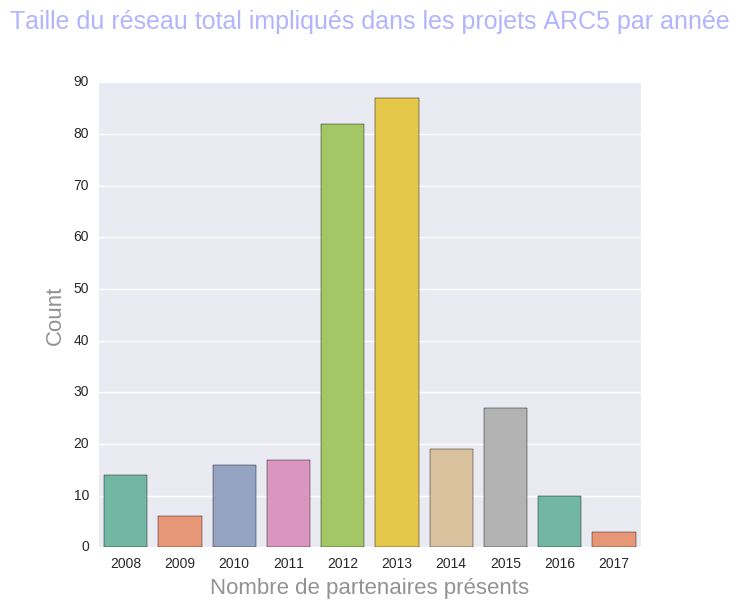

In [109]:
# taille du réseau par années
years= [n[1]["start"] for n in G_without_projects.nodes(data=True)]
Counter(years)

count_plot(
    years, 
    xlabel="Nombre de partenaires présents", 
    title='Taille du réseau total impliqués dans les projets ARC5 par année')

Counter({'2008': 8,
         '2009': 10,
         '2010': 10,
         '2011': 7,
         '2012': 9,
         '2013': 11,
         '2014': 12,
         '2015': 9,
         '2016': 9})